In [1]:
import pandas as pd
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows',None)
from wordcloud import WordCloud

In [2]:
df=pd.read_csv('drugsComTrain.csv')
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [3]:
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [4]:
df_train=df[(df.condition=='Birth Control') | (df.condition=='Depression') | (df.condition=='High Blood Pressure') | (df.condition=='Diabetes, Type 2')]

In [5]:
df_train.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [6]:
df.shape

(161297, 7)

In [7]:
df_train.shape

(42732, 7)

In [8]:
X=df_train.drop(['Unnamed: 0', 'drugName', 'rating', 'date','usefulCount'],axis=1)
X.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."
14,Birth Control,"""Started Nexplanon 2 months ago because I have..."


In [9]:
X.condition.value_counts()

condition
Birth Control          28788
Depression              9069
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: count, dtype: int64

In [10]:
X_birth=X[X.condition=='Birth Control']
X_dep=X[X.condition=='Depression']
X_bp=X[X.condition=='High Blood Pressure']
X_diab=X[X.condition=='Diabetes, Type 2']

Text(0.5, 1.0, 'wordccloud for birth control')

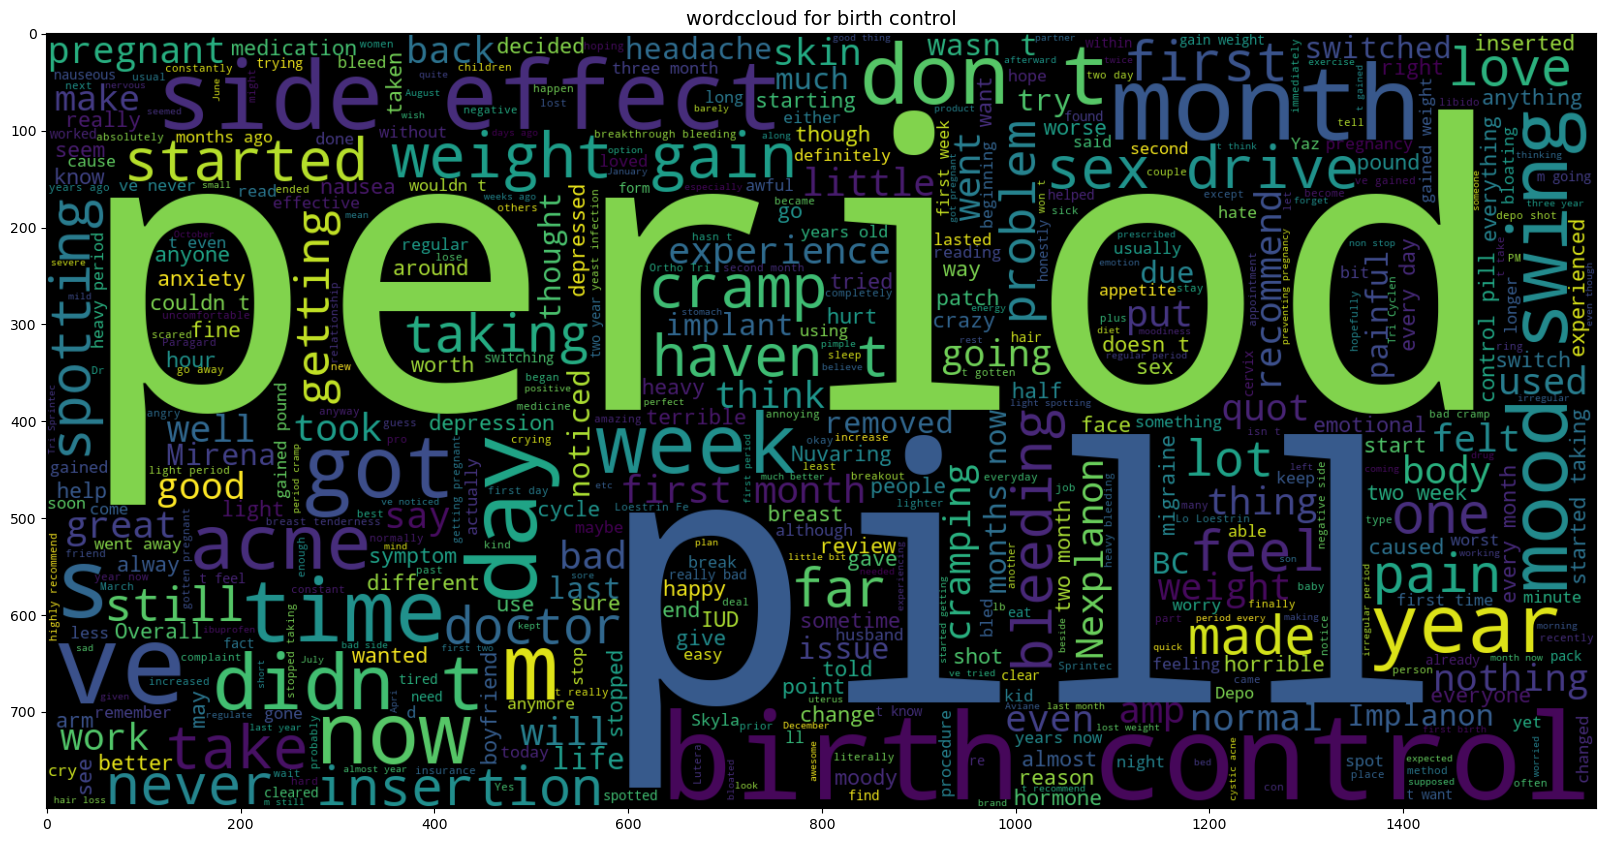

In [11]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500,width=1600,height=800).generate(" ".join(X_birth.review))
plt.imshow(wc,interpolation='bilinear')
plt.title('wordccloud for birth control',fontsize=14)

In [12]:
X.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."
14,Birth Control,"""Started Nexplanon 2 months ago because I have..."


In [13]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [14]:
for i,col in enumerate(X.columns):
    X.iloc[:,i]=X.iloc[:,i].str.replace('"',' ')

In [15]:
pd.set_option('max_colwidth', None)
X.head()

,condition,review
2,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."
3,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"
9,Birth Control,"I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger."
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
14,Birth Control,"Started Nexplanon 2 months ago because I have a minimal amount of contraception&#039;s I can take due to my inability to take the hormone that is used in most birth controls. I&#039;m trying to give it time because it is one of my only options right now. But honestly if I had options I&#039;d get it removed.\r\nI&#039;ve never had acne problems in my life, and immediately broke out after getting it implanted. Sex drive is completely gone, and I used to have sex with my boyfriend a few days a week, now its completely forced and not even fun for me anymore. I mean I&#039;m on birth control because I like having sex but don&#039;t want to get pregnant, why take a birth control that takes away sex? Very unhappy and hope that I get it back with time or I&#039;m getting it removed."


In [62]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/8f710be9-7308-4736-bc87-
[nltk_data]     636d26e39a1c/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/8f710be9-7308-4736-bc87-
[nltk_data]     636d26e39a1c/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
stop = nltk.corpus.stopwords.words('english')

In [ ]:
#!pip install Image
#from Ipython.display import Image
#Image(filename='stem.JPG')

In [66]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
porter=PorterStemmer()
lemmatizer=WordNetLemmatizer()
from bs4 import BeautifulSoup
import re

In [76]:

def review_to_words(raw_review):
    # delete html
    review_text=BeautifulSoup(raw_review,'html.parser').get_text()
    # make space
    letters_only=re.sub('[^a-zA-Z]',' ',review_text)
    # lower letters
    words=letters_only.lower().split()
    # stop words
    meaningful_words=[ w for w in words if not w in stop]
    # lemmatization
    lemmatize_words=[lemmatizer.lemmatize(z) for z in meaningful_words]
    # space join words
    return(" ".join(lemmatize_words))

In [78]:
X['review_clean']=X['review'].apply(review_to_words)

/tmp/ipykernel_2354/3820569617.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text=BeautifulSoup(raw_review,'html.parser').get_text()


In [80]:
X_feat=X['review_clean']
y=X['condition']

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X_feat,y,stratify=y,test_size=0.2,random_state=0)

In [84]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45) # 
    
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without Normalization')
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')
        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

In [86]:
count_vectorizer=CountVectorizer(stop_words='english')
count_train=count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)

In [88]:
y_test.value_counts()

condition
Birth Control          5758
Depression             1814
Diabetes, Type 2        511
High Blood Pressure     464
Name: count, dtype: int64

accuracy: 0.970
Confusion Matrix without Normalization


/tmp/ipykernel_2354/1443288760.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


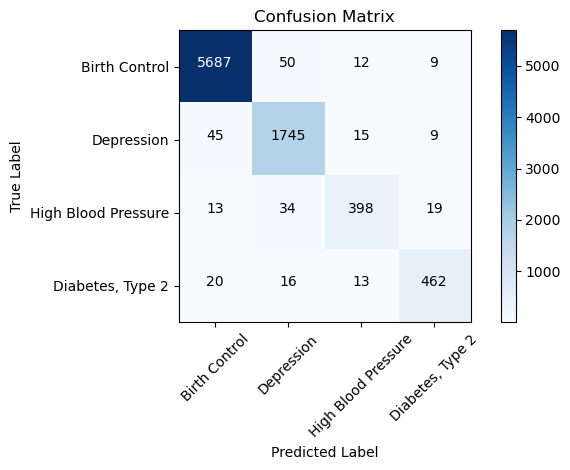

In [90]:
mnb=MultinomialNB()
mnb.fit(count_train,y_train)
pred=mnb.predict(count_test)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' %score)
cm=metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','High Blood Pressure','Diabetes, Type 2'])

# Passive Aggressive Classifier

accuracy: 0.978
Confusion Matrix without Normalization


/tmp/ipykernel_2354/1443288760.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


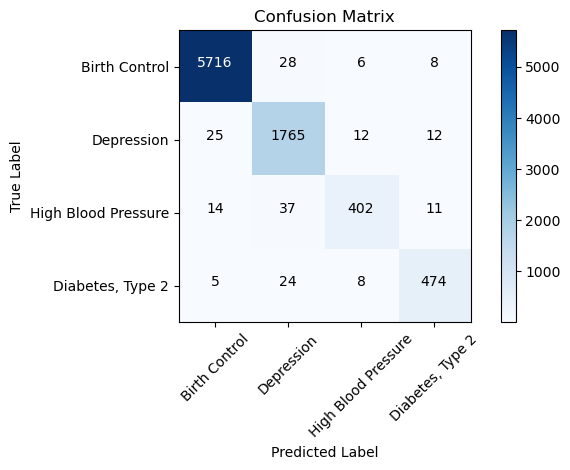

In [92]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
passive=PassiveAggressiveClassifier()
passive.fit(count_train,y_train)
pred=passive.predict(count_test)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' %score)
cm=metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','High Blood Pressure','Diabetes, Type 2'])

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.8)
tfidf_train_2=tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2=tfidf_vectorizer.transform(X_test)

accuracy: 0.921
Confusion Matrix without Normalization


/tmp/ipykernel_2354/1443288760.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


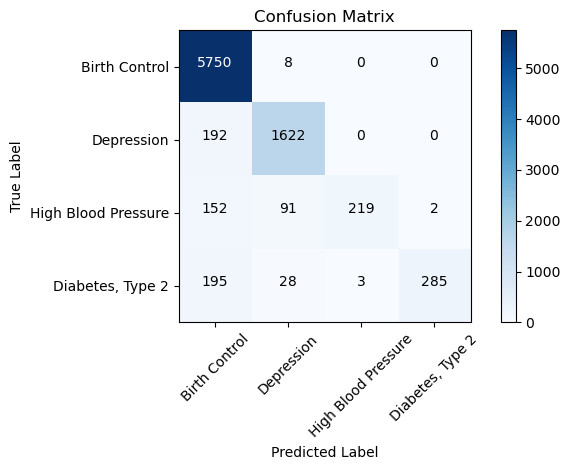

In [96]:
mnb=MultinomialNB()
mnb.fit(tfidf_train_2,y_train)
pred=mnb.predict(tfidf_test_2)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' %score)
cm=metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','High Blood Pressure','Diabetes, Type 2'])

accuracy: 0.982
Confusion Matrix without Normalization


/tmp/ipykernel_2354/1443288760.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


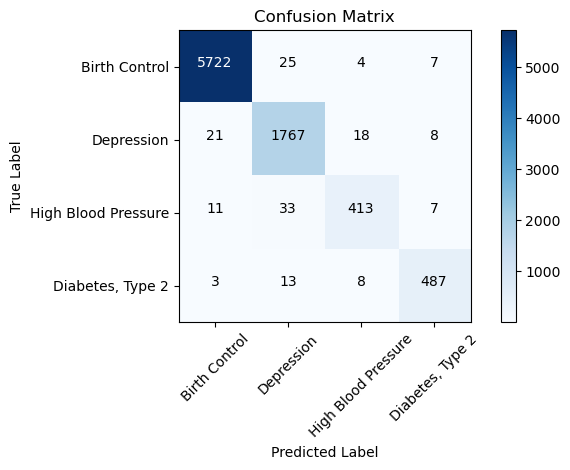

In [98]:
passive.fit(tfidf_train_2,y_train)
pred=passive.predict(tfidf_test_2)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' %score)
cm=metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','High Blood Pressure','Diabetes, Type 2'])

#Bigram tfidf 

accuracy: 0.986
Confusion Matrix without Normalization


/tmp/ipykernel_2354/1443288760.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


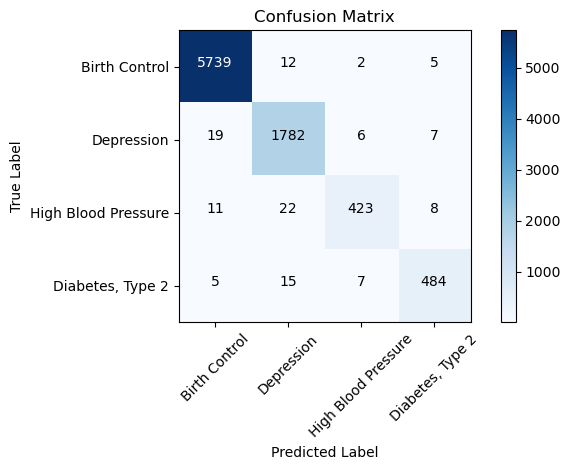

In [100]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.8,ngram_range=(1,2))
tfidf_train_2=tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2=tfidf_vectorizer.transform(X_test)
passive.fit(tfidf_train_2,y_train)
pred=passive.predict(tfidf_test_2)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' %score)
cm=metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','High Blood Pressure','Diabetes, Type 2'])

In [ ]:
#trigram

accuracy: 0.986
Confusion Matrix without Normalization


/tmp/ipykernel_2354/1443288760.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


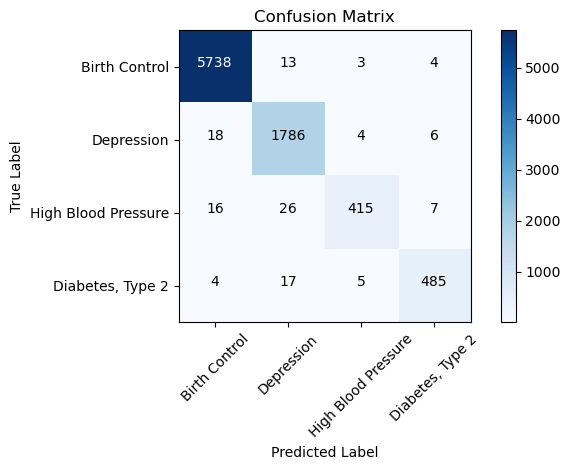

In [102]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.8,ngram_range=(1,3))
tfidf_train_2=tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2=tfidf_vectorizer.transform(X_test)
passive.fit(tfidf_train_2,y_train)
pred=passive.predict(tfidf_test_2)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' %score)
cm=metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','High Blood Pressure','Diabetes, Type 2'])

In [104]:
# Most Important Features
def most_informative_feature_for_class(vectorizer,classifier,classlabel,n=10):
    labelid=list(classifier.classes_).index(classlabel)
    feature_names=vectorizer.get_feature_names_out() # get_feature_names()
    topn=sorted(zip(classifier.coef_[labelid],feature_names))[-n:]
    for coef,feat in topn:
        print(classlabel,feat,coef)

most_informative_feature_for_class(tfidf_vectorizer,passive,'Birth Control')

Birth Control month 4.805938676356367
Birth Control cramp 5.197434406878957
Birth Control spotting 5.220231126531445
Birth Control pregnant 5.573417007521027
Birth Control bleeding 6.103641869754864
Birth Control birth control 6.672300705291933
Birth Control birth 6.989221315910017
Birth Control acne 7.138412828501942
Birth Control pill 8.888931093781242
Birth Control period 11.537933115255676


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer,passive,'Depression')

In [ ]:
most_informative_feature_for_class(tfidf_vectorizer,passive,'High Blood Pressure')

In [ ]:
most_informative_feature_for_class(tfidf_vectorizer,passive,'Diabetes, Type 2')

In [ ]:
X.tail(2)

In [ ]:
text=["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test=tfidf_vectorizer.transform(text)
pred1=passive.predict(test)
pred1

In [ ]:
# flask web app:: use rating; to predict medical condition and top 3 drugs

In [108]:
import joblib
joblib.dump(tfidf_vectorizer,'passive_model.pkl')
joblib.dump(passive,'passive_trigram.pkl')

['passive_trigram.pkl']

In [110]:
vectorizer=joblib.load('passive_model.pkl')
model=joblib.load('passive_trigram.pkl')

In [116]:
test=model.predict(vectorizer.transform(['ok cant really rate yet based well working really th day technically nd cut half mg past day taking till confident enough take full extremely scared side effect especially nausea vomiting read much sensitive stomach medicine make sick far nausea medicine although mg taken meal every time optimistic help anxiety may increase mg week feel difference however let review scare every person different']))
test                   

array(['Depression'], dtype='<U19')

In [120]:
def top_drugs_extractor(condition,df):
    df_top=df[(df['rating']>=9)&(df['usefulCount']>=100)].sort_values(by=['rating','usefulCount'],ascending=[False,False])
    drug_lst=df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [118]:
df.head(2)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8.0,"April 27, 2010",192


In [112]:
X_test.tail(3)

100521                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               made nauseous
8913      surgery third laparoscopic procedure endometriosis skyla inserted anesthesia feel actual insertion mirena obgyn office without taking anything prior fairly uncomfortable said history pregnancy high threshold pain skyla roughly three half month first two period fairly normal third noticeably lighter hopefully vanish mine w mirena bad stuff cystic acne first month hellish super painful cystic acne chin along jawline forehead bad required cortisone injection derm spironalactone improved
15